In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [97]:
moviesData = pd.read_csv("IMDB-Movie-Data.csv")
moviesData.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [98]:
moviesData = moviesData[['Rank', 'Genre', 'Director', 'Actors', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']]

In [99]:
moviesData['Genre'] = moviesData['Genre'].str.split(',').str[0]

In [100]:
top_10_genres = moviesData['Genre'].value_counts().head(10).index
moviesData = moviesData[moviesData['Genre'].isin(top_10_genres)]

In [101]:
label_encoder_genre = LabelEncoder()
moviesData['Genre'] = label_encoder_genre.fit_transform(moviesData['Genre'])

In [102]:
label_encoder_director = LabelEncoder()
moviesData['Director'] = label_encoder_director.fit_transform(moviesData['Director'])

In [103]:
moviesData['Actors'] = moviesData['Actors'].str.split(', ').str[0]
label_encoder_actor = LabelEncoder()
moviesData['Actors'] = label_encoder_actor.fit_transform(moviesData['Actors'])

In [104]:
moviesData

,Rank,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,0,264,94,2014,121,8.1,757074,333.13,76.0
1,2,1,514,389,2012,124,7.0,485820,126.46,65.0
2,3,7,388,220,2016,117,7.3,157606,138.12,62.0
3,4,2,104,346,2016,108,7.2,60545,270.32,59.0
4,5,0,135,510,2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...
995,996,5,68,88,2015,111,6.2,27585,NaN,45.0
996,997,7,175,304,2007,94,5.5,73152,17.54,46.0
997,998,6,322,424,2008,98,6.2,70699,58.01,50.0
998,999,1,545,7,2014,93,5.6,4881,NaN,22.0


In [105]:
moviesData.rename(columns={'Runtime (Minutes)': 'Runtime_Minutes', 'Revenue (Millions)': 'Revenue_Millions'}, inplace=True)

In [106]:
moviesData = moviesData.dropna(subset=['Metascore', 'Revenue_Millions'])

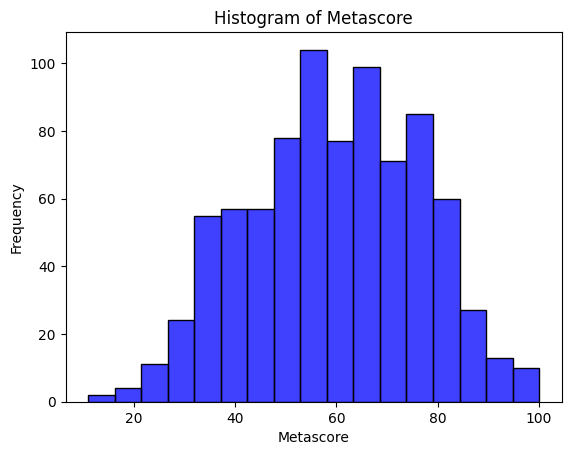

In [107]:
sns.histplot(moviesData['Metascore'], kde=False, color='blue')
plt.title('Histogram of Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

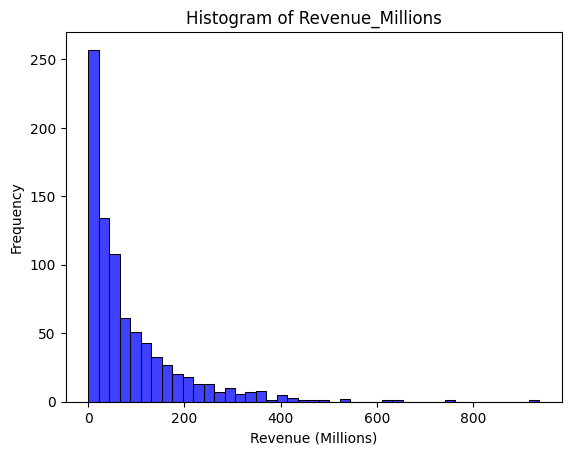

In [108]:
sns.histplot(moviesData['Revenue_Millions'], kde=False, color='blue')
plt.title('Histogram of Revenue_Millions')
plt.xlabel('Revenue (Millions)')
plt.ylabel('Frequency')
plt.show()


In [109]:
moviesData

,Rank,Genre,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,0,264,94,2014,121,8.1,757074,333.13,76.0
1,2,1,514,389,2012,124,7.0,485820,126.46,65.0
2,3,7,388,220,2016,117,7.3,157606,138.12,62.0
3,4,2,104,346,2016,108,7.2,60545,270.32,59.0
4,5,0,135,510,2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...
993,994,0,484,367,2010,97,5.9,140900,60.13,37.0
994,995,4,459,485,2012,88,6.7,164088,54.72,48.0
996,997,7,175,304,2007,94,5.5,73152,17.54,46.0
997,998,6,322,424,2008,98,6.2,70699,58.01,50.0


In [110]:
moviesData.to_csv('movie_data_final', index=False)
